In [ ]:
import pandas as pd
from google.colab import drive
import json
import seaborn as sns
import matplotlib.pyplot as plt

drive.mount('/content/drive')

df_train = pd.read_csv("/content/drive/MyDrive/DSC/DATA/train.csv")
df_items = pd.read_csv("/content/drive/MyDrive/DSC/DATA/item_metadata_filtered.csv")
with open("/content/drive/MyDrive/DSC/DATA/id_mappings.json", "r") as f:
    id_mappings = json.load(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_items

,parent_asin,main_category,title,average_rating,rating_number,price,store,features,description,images,categories,image_count,has_images,image_urls,category
0,B07WFSQXL5,All Beauty,PPY Eyelash Growth Serum – Natural Ingredients...,3.9,114.0,NaN,PPY,[],[],{'hi_res': array(['https://m.media-amazon.com/...,[],27,True,['https://m.media-amazon.com/images/I/615N6fkc...,All_Beauty
1,B08BV6F6BC,All Beauty,Wixar Natural Sea Moss Soap - (2 PACK) - Laven...,4.4,41.0,NaN,WIXAR NATURALS,[],[],{'hi_res': array(['https://m.media-amazon.com/...,[],21,True,['https://m.media-amazon.com/images/I/81ugegqe...,All_Beauty
2,B07Z818MLY,All Beauty,7 Packs Deep Wave Crochet Hair 22 Inch Deep wa...,3.4,10.0,NaN,Yun Mei Hair,[],[],{'hi_res': array(['https://m.media-amazon.com/...,[],21,True,['https://m.media-amazon.com/images/I/71aVcpK8...,All_Beauty
3,B071DY8Z4B,All Beauty,BEWAVE Hair Brush Sponge Twist With Comb Hair ...,4.2,24.0,NaN,BEWAVE,[],[],{'hi_res': array(['https://m.media-amazon.com/...,[],17,True,['https://m.media-amazon.com/images/I/61or2jYp...,All_Beauty
4,B0BTLTVR1X,All Beauty,"Zydeco Chop Chop Cajun Seasoning Base, 8 Ounce...",4.7,21.0,NaN,BORELTH,"['All Natural blend of Dehydrated Onion, Dehyd...",['Zydeco Chop Chop is a blend of Dehydrated On...,{'hi_res': array(['https://m.media-amazon.com/...,[],3,True,['https://m.media-amazon.com/images/I/71707mY6...,All_Beauty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77828,B000NE85S2,NaN,Quicken Family Lawyer (CD-ROM),3.5,14.0,NaN,Parsons Technology,"[""America's Best-Selling Legal Software!""\n 'P...",['86 Forms in 10 categories: Estate Planning (...,"{'hi_res': array([None], dtype=object), 'large...",['Software' 'Business & Office' 'Legal'],2,True,['https://m.media-amazon.com/images/I/41+rSEEa...,Software
77829,B076NZT5VY,Software,Ubuntu 16.04 Linux Desktop - 32-Bit 64-Bit Sup...,3.7,4.0,NaN,BrownTech PC System Tools,['Ubuntu 16.04 Linux on 2 Disc DVD Set 32 Bit ...,"['Ubuntu 16.04 ""Xenial Xerus"" 64-BIT & 32BIT L...",{'hi_res': array(['https://m.media-amazon.com/...,['Software' 'Linux' 'Operating Systems & Utili...,18,True,['https://m.media-amazon.com/images/I/71QlusvD...,Software
77830,B001FSG0TQ,NaN,The Print Shop: Labels and Logos 2009,2.3,4.0,NaN,Encore,['Drag-and-drop design tools' 'Photo-realistic...,['Everything you need to create impressive lab...,"{'hi_res': array([None], dtype=object), 'large...",['Software' 'Business & Office' 'Office Suites'],2,True,['https://m.media-amazon.com/images/I/51xSHvST...,Software
77831,B0009STM5C,Software,Jumpstart Advanced Kindergarten (PC & Mac) [OL...,3.7,4.0,NaN,Knowledge Adventure,['This 3-CD set uses a fun animal theme to int...,['From the Manufacturer'\n 'The JumpStart Adva...,"{'hi_res': array([None], dtype=object), 'large...","['Software' 'Blizzard, Knowledge Adventure & S...",2,True,['https://m.media-amazon.com/images/I/41YPPRP8...,Software


In [ ]:
df=df_items.copy()

In [ ]:
df.head(5)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77833 entries, 0 to 77832
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   parent_asin     77833 non-null  object 
 1   main_category   77720 non-null  object 
 2   title           77830 non-null  object 
 3   average_rating  77833 non-null  float64
 4   rating_number   76170 non-null  float64
 5   price           50162 non-null  float64
 6   store           75916 non-null  object 
 7   features        77833 non-null  object 
 8   description     77833 non-null  object 
 9   images          77833 non-null  object 
 10  categories      77833 non-null  object 
 11  image_count     77833 non-null  int64  
 12  has_images      77833 non-null  bool   
 13  image_urls      77833 non-null  object 
 14  category        77833 non-null  object 
dtypes: bool(1), float64(3), int64(1), object(10)
memory usage: 8.4+ MB


,average_rating,rating_number,price,image_count
count,77833.000000,7.617000e+04,50162.000000,77833.000000
mean,3.620678,6.739909e+02,4.828681,9.315830
std,0.614011,1.203217e+04,26.525784,7.129278
min,1.000000,1.000000e+00,0.000000,0.000000
25%,3.200000,1.500000e+01,0.000000,4.000000
50%,3.600000,4.200000e+01,0.000000,6.000000
75%,4.100000,1.430000e+02,0.990000,12.000000
max,5.000000,1.898759e+06,2325.000000,288.000000


In [ ]:
df.nunique()

,0
parent_asin,77833
main_category,8
title,75867
average_rating,41
rating_number,3613
price,2136
store,33713
features,51521
description,53857
images,76714


In [ ]:
df.isnull().sum()

,0
parent_asin,0
main_category,113
title,3
average_rating,0
rating_number,1663
price,27671
store,1917
features,0
description,0
images,0


In [ ]:
from collections import Counter
import re

all_words = " ".join(df['title'].dropna()).lower()
words = re.findall(r'\w+', all_words)
Counter(words).most_common(20)

[('for', 17031),
 ('and', 10738),
 ('hair', 10306),
 ('with', 7984),
 ('free', 6663),
 ('2', 5223),
 ('pack', 4647),
 ('3', 4259),
 ('of', 4230),
 ('1', 4050),
 ('nail', 4005),
 ('the', 3962),
 ('women', 3828),
 ('oz', 3128),
 ('natural', 3020),
 ('4', 2918),
 ('black', 2771),
 ('game', 2628),
 ('set', 2613),
 ('brush', 2597)]

(np.float64(-0.5), np.float64(1499.5), np.float64(1499.5), np.float64(-0.5))

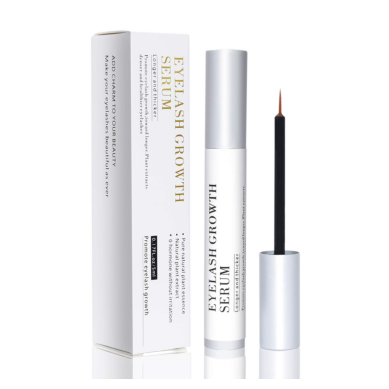

In [ ]:
import requests
from PIL import Image
from io import BytesIO

raw = df['image_urls'].dropna().iloc[0]
url = raw.strip("[]").replace("'", "").split(',')[0].strip()
response = requests.get(url)
img = Image.open(BytesIO(response.content))
plt.imshow(img)
plt.axis('off')

In [ ]:
df

,parent_asin,main_category,title,average_rating,rating_number,price,store,features,description,images,categories,image_count,has_images,image_urls,category
0,B07WFSQXL5,All Beauty,PPY Eyelash Growth Serum – Natural Ingredients...,3.9,114.0,NaN,PPY,[],[],{'hi_res': array(['https://m.media-amazon.com/...,[],27,True,['https://m.media-amazon.com/images/I/615N6fkc...,All_Beauty
1,B08BV6F6BC,All Beauty,Wixar Natural Sea Moss Soap - (2 PACK) - Laven...,4.4,41.0,NaN,WIXAR NATURALS,[],[],{'hi_res': array(['https://m.media-amazon.com/...,[],21,True,['https://m.media-amazon.com/images/I/81ugegqe...,All_Beauty
2,B07Z818MLY,All Beauty,7 Packs Deep Wave Crochet Hair 22 Inch Deep wa...,3.4,10.0,NaN,Yun Mei Hair,[],[],{'hi_res': array(['https://m.media-amazon.com/...,[],21,True,['https://m.media-amazon.com/images/I/71aVcpK8...,All_Beauty
3,B071DY8Z4B,All Beauty,BEWAVE Hair Brush Sponge Twist With Comb Hair ...,4.2,24.0,NaN,BEWAVE,[],[],{'hi_res': array(['https://m.media-amazon.com/...,[],17,True,['https://m.media-amazon.com/images/I/61or2jYp...,All_Beauty
4,B0BTLTVR1X,All Beauty,"Zydeco Chop Chop Cajun Seasoning Base, 8 Ounce...",4.7,21.0,NaN,BORELTH,"['All Natural blend of Dehydrated Onion, Dehyd...",['Zydeco Chop Chop is a blend of Dehydrated On...,{'hi_res': array(['https://m.media-amazon.com/...,[],3,True,['https://m.media-amazon.com/images/I/71707mY6...,All_Beauty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77828,B000NE85S2,NaN,Quicken Family Lawyer (CD-ROM),3.5,14.0,NaN,Parsons Technology,"[""America's Best-Selling Legal Software!""\n 'P...",['86 Forms in 10 categories: Estate Planning (...,"{'hi_res': array([None], dtype=object), 'large...",['Software' 'Business & Office' 'Legal'],2,True,['https://m.media-amazon.com/images/I/41+rSEEa...,Software
77829,B076NZT5VY,Software,Ubuntu 16.04 Linux Desktop - 32-Bit 64-Bit Sup...,3.7,4.0,NaN,BrownTech PC System Tools,['Ubuntu 16.04 Linux on 2 Disc DVD Set 32 Bit ...,"['Ubuntu 16.04 ""Xenial Xerus"" 64-BIT & 32BIT L...",{'hi_res': array(['https://m.media-amazon.com/...,['Software' 'Linux' 'Operating Systems & Utili...,18,True,['https://m.media-amazon.com/images/I/71QlusvD...,Software
77830,B001FSG0TQ,NaN,The Print Shop: Labels and Logos 2009,2.3,4.0,NaN,Encore,['Drag-and-drop design tools' 'Photo-realistic...,['Everything you need to create impressive lab...,"{'hi_res': array([None], dtype=object), 'large...",['Software' 'Business & Office' 'Office Suites'],2,True,['https://m.media-amazon.com/images/I/51xSHvST...,Software
77831,B0009STM5C,Software,Jumpstart Advanced Kindergarten (PC & Mac) [OL...,3.7,4.0,NaN,Knowledge Adventure,['This 3-CD set uses a fun animal theme to int...,['From the Manufacturer'\n 'The JumpStart Adva...,"{'hi_res': array([None], dtype=object), 'large...","['Software' 'Blizzard, Knowledge Adventure & S...",2,True,['https://m.media-amazon.com/images/I/41YPPRP8...,Software


<Axes: xlabel='average_rating', ylabel='Count'>

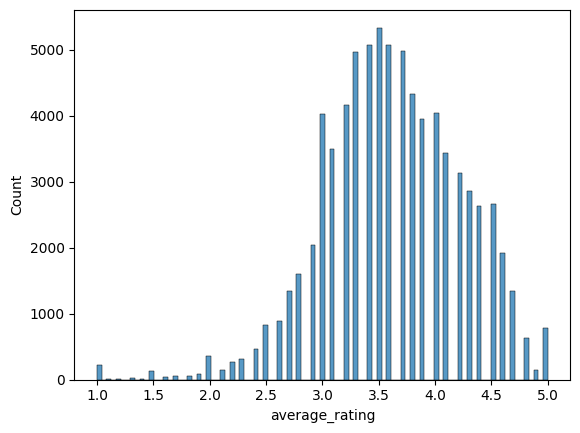

In [ ]:
sns.histplot(df["average_rating"])

<Axes: xlabel='category', ylabel='Count'>

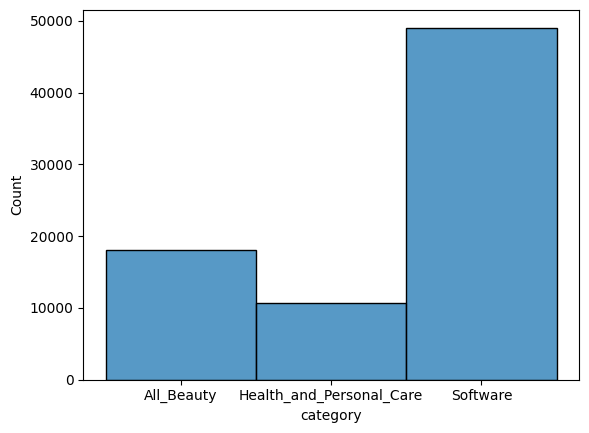

In [ ]:
sns.histplot(df["category"])

<Axes: xlabel='main_category', ylabel='Count'>

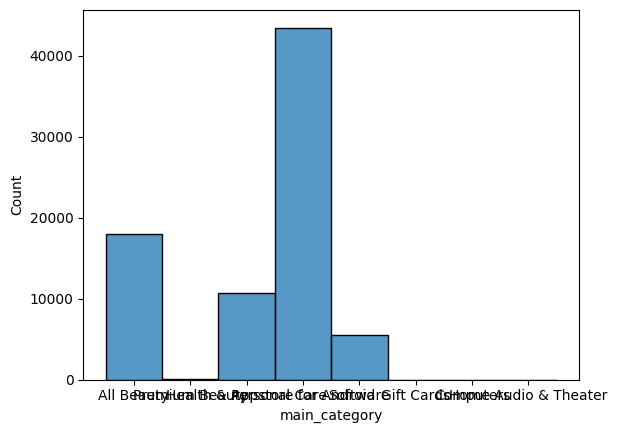

In [ ]:
sns.histplot(df['main_category'])

Kilks kategori całkowicie dominuje dataset

<Axes: >

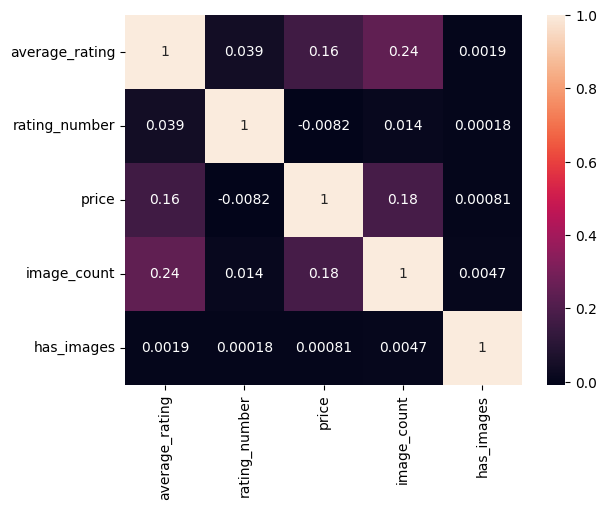

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

<Axes: xlabel='price', ylabel='Count'>

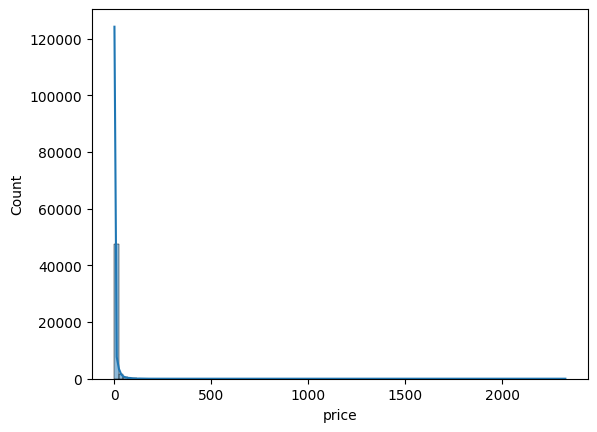

In [ ]:
sns.histplot(df['price'].dropna(), bins=100, kde=True)

Cena pokazuje rozkład prawostronny

<Axes: xlabel='has_images', ylabel='count'>

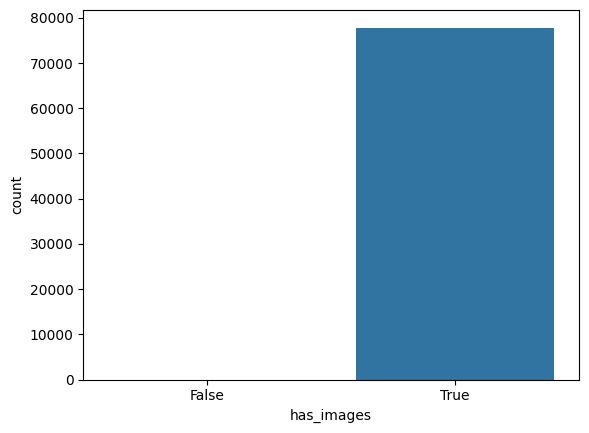

In [ ]:
sns.countplot(x=df['has_images'].dropna())

Brak itemów bez zdjęć

# Tekstowe

title

Średnia długość (znaki): 60.461308185474024
Średnia długość (tokeny): 9.704405586319428
Top 20 unigramów: [('hair', np.int64(10306)), ('free', np.int64(6663)), ('pack', np.int64(4647)), ('nail', np.int64(4005)), ('women', np.int64(3828)), ('oz', np.int64(3128)), ('natural', np.int64(3020)), ('black', np.int64(2771)), ('game', np.int64(2628)), ('set', np.int64(2613)), ('brush', np.int64(2597)), ('games', np.int64(2207)), ('body', np.int64(2094)), ('kids', np.int64(2026)), ('3d', np.int64(2002)), ('makeup', np.int64(1972)), ('version', np.int64(1928)), ('skin', np.int64(1888)), ('kit', np.int64(1876)), ('men', np.int64(1830))]
Top 20 bigramów: [('old version', np.int64(1548)), ('human hair', np.int64(850)), ('nail art', np.int64(756)), ('fl oz', np.int64(732)), ('men women', np.int64(666)), ('nail polish', np.int64(623)), ('long lasting', np.int64(533)), ('kindle tablet', np.int64(530)), ('hair extensions', np.int64(513)), ('tablet edition', np.int64(492)), ('hidden object', np.int64(472

Text(0.5, 1.0, 'Rozkład wartości IDF')

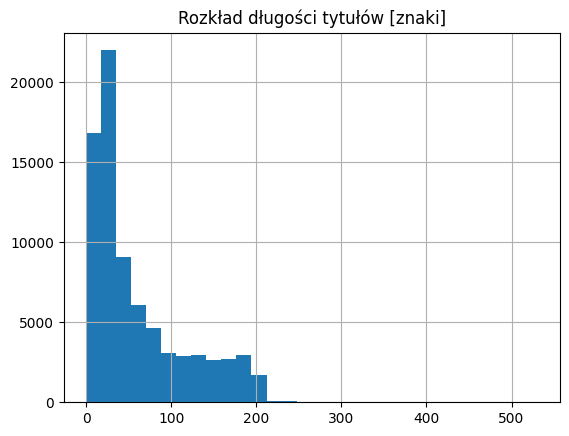

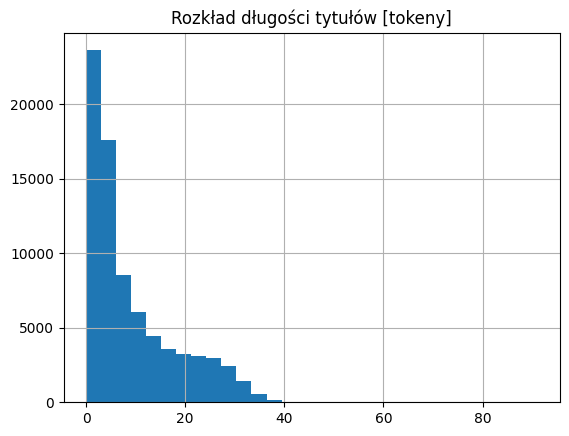

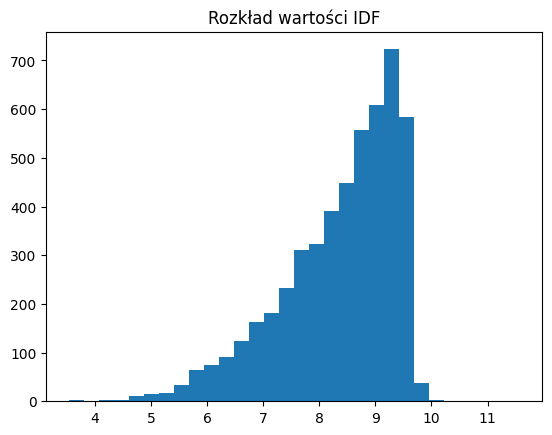

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt

titles = df_items['title'].fillna('').str.lower()

char_lens = titles.str.len()
token_lens = titles.str.split().str.len()

print("Średnia długość (znaki):", char_lens.mean())
print("Średnia długość (tokeny):", token_lens.mean())

plt.figure(); char_lens.hist(bins=30); plt.title("Rozkład długości tytułów [znaki]")
plt.figure(); token_lens.hist(bins=30); plt.title("Rozkład długości tytułów [tokeny]")

cv_uni = CountVectorizer(ngram_range=(1,1), stop_words='english')
cv_bi  = CountVectorizer(ngram_range=(2,2), stop_words='english')

X_uni = cv_uni.fit_transform(titles)
X_bi  = cv_bi.fit_transform(titles)

# top 20 najczęstszych unigramów i bigramów
uni_counts = X_uni.sum(axis=0).A1
bi_counts  = X_bi.sum(axis=0).A1

uni_idx = uni_counts.argsort()[::-1][:20]
bi_idx  = bi_counts.argsort()[::-1][:20]

top_unigrams = [(cv_uni.get_feature_names_out()[i], uni_counts[i]) for i in uni_idx]
top_bigrams  = [(cv_bi.get_feature_names_out()[i],  bi_counts[i]) for i in bi_idx]

print("Top 20 unigramów:", top_unigrams)
print("Top 20 bigramów:", top_bigrams)

tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf.fit(titles)
idf = tfidf.idf_
plt.figure(); plt.hist(idf, bins=30); plt.title("Rozkład wartości IDF")


Większość tytułów nie przekracza 20 słów, średnia to 9.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

titles = df_items['title'].fillna('').str.lower()

cv = CountVectorizer(ngram_range=(1,1), stop_words='english')
_ = cv.fit_transform(titles)

vocab_size = len(cv.vocabulary_)
print(f"Liczba unikalnych słów w tytułach: {vocab_size}")


Liczba unikalnych słów w tytułach: 42081


In [ ]:


from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import sparse

titles = df_items['title'].fillna('').str.lower()
tfidf = TfidfVectorizer(ngram_range=(1,1), min_df=10, max_df=0.5, max_features=1000)
X_title = tfidf.fit_transform(titles)


In [ ]:
X_title

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 408713 stored elements and shape (77833, 1000)>

In [ ]:
feature_names = tfidf.get_feature_names_out()
print(len(feature_names), feature_names[:20])


1000 ['10' '100' '11' '12' '120' '13' '14' '15' '16' '17' '18' '180' '1b' '20'
 '200' '2010' '2011' '2013' '2014' '2015']


##Przykładowa reprezentacja jednego z tytułów przy pomocy Tfidf

Wagi słów odzwierciedlaja jak bardzo dane słowo charakteryzuje dany wektor (tytuł)

Ustala się to na podstawie wystąpień tego słowa w danym wektorze oraz w innych wektorach.

###1.Częste występowanie w całej macierzy + czeste wystepowanie w danym wektorze = przeciętna liczba, słowo nie jest jakies bardzo charakterystyczne dla danego wektora względem innych, ale jego czeste występowanie zostanie dostrzeżone

###2.Rzadkie występowanie w całej macierzy + czeste wystepowanie w danym wektorze = duża liczba, słowo jest bardzo charakterystyczne dla danego wektora

itd.


In [ ]:
feature_names = tfidf.get_feature_names_out()

row = X_title.getrow(0)

idxs = row.indices
vals = row.data

for i, v in zip(idxs, vals):
    print(f"{feature_names[i]}: {v:.3f}")


eyelash: 0.267
growth: 0.608
serum: 0.292
natural: 0.188
ingredients: 0.317
advanced: 0.302
formula: 0.284
and: 0.140
lashes: 0.250
white: 0.235
pack: 0.168


#features

Średnia długość (znaki): 235.40259273058984
Średnia długość (tokeny): 36.650932123906315


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



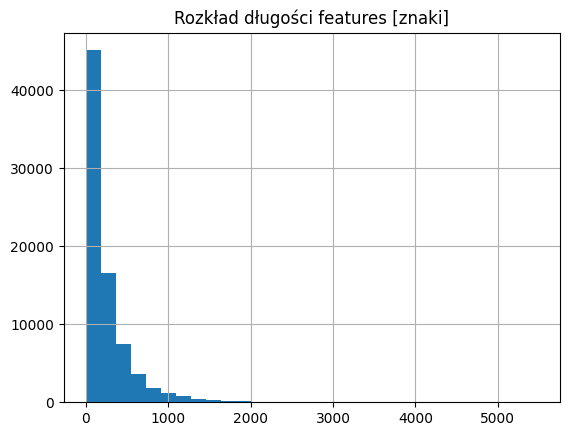

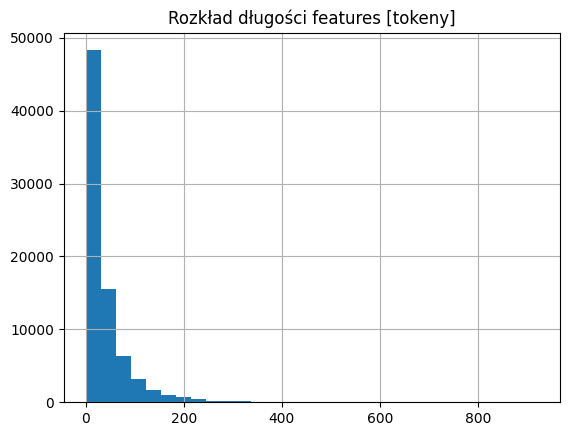

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt

features = df_items['features'].fillna('').str.lower()

char_lens = features.str.len()
token_lens = features.str.split().str.len()

print("Średnia długość (znaki):", char_lens.mean())
print("Średnia długość (tokeny):", token_lens.mean())

# histogram
plt.figure(); char_lens.hist(bins=30); plt.title("Rozkład długości features [znaki]")
plt.figure(); token_lens.hist(bins=30); plt.title("Rozkład długości features [tokeny]")

cv_uni = CountVectorizer(ngram_range=(1,1), stop_words='english')
cv_bi  = CountVectorizer(ngram_range=(2,2), stop_words='english')

X_uni = cv_uni.fit_transform(features)
X_bi  = cv_bi.fit_transform(features)

# top 20 najczęstszych unigramów i bigramów
uni_counts = X_uni.sum(axis=0).A1
bi_counts  = X_bi.sum(axis=0).A1

uni_idx = uni_counts.argsort()[::-1][:20]
bi_idx  = bi_counts.argsort()[::-1][:20]

top_unigrams = [(cv_uni.get_feature_names_out()[i], uni_counts[i]) for i in uni_idx]
top_bigrams  = [(cv_bi.get_feature_names_out()[i],  bi_counts[i]) for i in bi_idx]

print("Top 20 unigramów:", top_unigrams)
print("Top 20 bigramów:", top_bigrams)

tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf.fit(features)
idf = tfidf.idf_
plt.figure(); plt.hist(idf, bins=30); plt.title("Rozkład wartości IDF")


Features jest nieco dłuższe, ale możemy zakodować je tak samo jak title

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import sparse

# 1. Przygotuj tekst
feats = df_items['features'].fillna('').str.lower()

# 2. Utwórz TF-IDF
tfidf_feats = TfidfVectorizer(
    ngram_range=(1,2),
    min_df=20,
    max_df=0.7,
    max_features=2000,
    stop_words=['easy','use','free','game','play']
)

X_feats = tfidf_feats.fit_transform(feats)

print("Wymiar macierzy features:", X_feats.shape)
print("Przykładowe cechy:", tfidf_feats.get_feature_names_out()[:10])



In [ ]:
feature_names = tfidf_feats.get_feature_names_out()

row = X_feats.getrow(5)

for idx, val in zip(row.indices, row.data):
    print(f"{feature_names[idx]:<20} {val:.3f}")


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


nnz_per_row = X_feats.getnnz(axis=1)


plt.figure()
plt.hist(nnz_per_row, bins=30)
plt.title("Rozkład liczby nie-zerowych cech w macierzy `features`")
plt.xlabel("Liczba nie-zerowych elementów w wektorze")
plt.ylabel("Liczba przedmiotów")
plt.show()


print("Min:", nnz_per_row.min())
print("25. percentyl:", np.percentile(nnz_per_row, 25))
print("Mediana:", np.median(nnz_per_row))
print("75. percentyl:", np.percentile(nnz_per_row, 75))
print("Max:", nnz_per_row.max())


#description

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt

description = df_items['description'].fillna('').str.lower()

char_lens = description.str.len()
token_lens = description.str.split().str.len()

print("Średnia długość (znaki):", char_lens.mean())
print("Średnia długość (tokeny):", token_lens.mean())

# histogramy
plt.figure(); char_lens.hist(bins=30); plt.title("Rozkład długości description [znaki]")
plt.figure(); token_lens.hist(bins=30); plt.title("Rozkład długości description [tokeny]")
plt.show()

cv_uni = CountVectorizer(ngram_range=(1,1), stop_words='english')
cv_bi  = CountVectorizer(ngram_range=(2,2), stop_words='english')

X_uni = cv_uni.fit_transform(description)
X_bi  = cv_bi.fit_transform(description)

uni_counts = X_uni.sum(axis=0).A1
bi_counts  = X_bi.sum(axis=0).A1

uni_idx = uni_counts.argsort()[::-1][:20]
bi_idx  = bi_counts.argsort()[::-1][:20]

top_unigrams = [(cv_uni.get_feature_names_out()[i], uni_counts[i]) for i in uni_idx]
top_bigrams  = [(cv_bi.get_feature_names_out()[i],  bi_counts[i]) for i in bi_idx]

print("Top 20 unigramów:", top_unigrams)
print("Top 20 bigramów:", top_bigrams)

tfidf = TfidfVectorizer(
    ngram_range=(1,2),
    min_df=50,
    max_df=0.8,
    max_features=5000,
    stop_words='english'
)
tfidf.fit(description)
idf = tfidf.idf_

plt.figure(); plt.hist(idf, bins=30); plt.title("Rozkład wartości IDF")
plt.show()


Description jest statystycznie duzo dłuższe niz inne cechy tekstowe, jest to bardziej szczegółowa wersja features. To jak duża ilośc kolumn reprezentuających description obciązy model nie jest warte tej informacji. Nie skorzystamy z description

# Zdjęcia

In [ ]:
df_items['image_urls'][0]

['https://m.media-amazon.com/images/I/615N6fkcn9L._SL1500_.jpg',
 'https://m.media-amazon.com/images/I/81VThfNtptL._SL1500_.jpg',
 'https://m.media-amazon.com/images/I/71U6hl1ancL._SL1500_.jpg',
 'https://m.media-amazon.com/images/I/71p2er91bHL._SL1500_.jpg',
 'https://m.media-amazon.com/images/I/71ZSKVbjDKL._SL1500_.jpg',
 'https://m.media-amazon.com/images/I/71ZKyAQreOL._SL1500_.jpg',
 'https://m.media-amazon.com/images/I/81TKaR25g7L._SL1500_.jpg',
 'https://m.media-amazon.com/images/I/81wSVZ-2nmL._SL1500_.jpg',
 'https://m.media-amazon.com/images/I/81qaY2mjEuL._SL1500_.jpg',
 'https://m.media-amazon.com/images/I/41yq3nUn6EL.jpg',
 'https://m.media-amazon.com/images/I/51SGg7l2S4L.jpg',
 'https://m.media-amazon.com/images/I/41t5-RO8F0L.jpg',
 'https://m.media-amazon.com/images/I/412svaaj2GL.jpg',
 'https://m.media-amazon.com/images/I/51hzxF+FEwL.jpg',
 'https://m.media-amazon.com/images/I/51yGSQO1M+L.jpg',
 'https://m.media-amazon.com/images/I/51pRl5qV0WL.jpg',
 'https://m.media-amazo

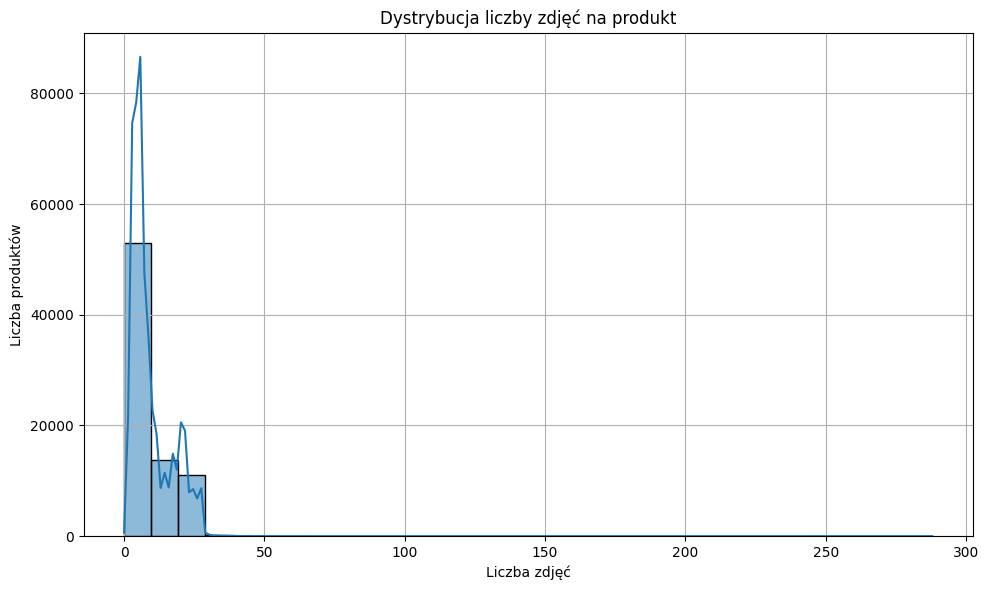

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_items['image_count'], bins=30, kde=True)

plt.title("Dystrybucja liczby zdjęć na produkt")
plt.xlabel("Liczba zdjęć")
plt.ylabel("Liczba produktów")
plt.grid(True)
plt.tight_layout()
plt.show()


Więszkosc produktów ma 0-10 zdjęć.
Zdjęcia są wymagające obliczeniowo. Dla każdego produktu użyjemy jedynie 3 pierwszych zdjęć.

EMBEDDINGI ZDJĘC

In [ ]:
import os
import torch
import numpy as np
from PIL import Image
import requests
from torchvision import models, transforms
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor, as_completed
import warnings



import ast

df_items['image_urls'] = df_items['image_urls'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)



SAVE_PATH = "/content/drive/MyDrive/DSC/EMBEDDINGS/image_embeddings_dict.npy"
CHECKPOINT_EVERY = 1000

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("✅ Używamy urządzenia:", device)

resnet = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
resnet = torch.nn.Sequential(*list(resnet.children())[:-1])  # bez klasyfikatora
resnet.to(device).eval()

preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

def process_single_image(url):
    try:
        image = Image.open(requests.get(url, timeout=3, stream=True).raw).convert("RGB")
        image = preprocess(image).unsqueeze(0).to(device)
        with torch.no_grad():
            emb = resnet(image).squeeze().cpu().numpy()  # zrzut z GPU do CPU
        return emb
    except:
        return np.zeros(512)

def get_image_embeddings(image_urls, max_images=3):
    image_urls = image_urls[:max_images]
    embeddings = []

    with ThreadPoolExecutor(max_workers=max_images) as executor:
        futures = [executor.submit(process_single_image, url) for url in image_urls]
        for future in as_completed(futures):
            embeddings.append(future.result())

    while len(embeddings) < max_images:
        embeddings.append(np.zeros(512))

    return np.stack(embeddings)  # shape: (3, 512)

if os.path.exists(SAVE_PATH):
    embeddings_dict = np.load(SAVE_PATH, allow_pickle=True).item()
    print(f"🔁 Wczytano zapis: {len(embeddings_dict)} produktów")
else:
    embeddings_dict = {}
    print("🆕 Nowy dict start")

# --- Filtrowanie brakujących produktów ---
remaining_rows = df_items[~df_items["parent_asin"].isin(embeddings_dict.keys())]
print(f"📦 Do przetworzenia: {len(remaining_rows)} produktów")

# --- Pętla główna ---
for idx, row in tqdm(remaining_rows.iterrows(), total=len(remaining_rows)):
    item_id = row['parent_asin']
    urls = row['image_urls']

    if not isinstance(urls, list) or len(urls) == 0:
        embeddings_dict[item_id] = np.zeros((3, 512))
        continue

    try:
        emb = get_image_embeddings(urls, max_images=3)
    except Exception as e:
        warnings.warn(f"Błąd dla produktu {item_id}: {e}")
        emb = np.zeros((3, 512))

    embeddings_dict[item_id] = emb

    if (idx + 1) % CHECKPOINT_EVERY == 0:
        np.save(SAVE_PATH, embeddings_dict)
        print(f"💾 Zapisano checkpoint: {idx+1} produktów")

np.save(SAVE_PATH, embeddings_dict)
print("✅ Przetwarzanie zakończone i zapisane")


✅ Używamy urządzenia: cuda
🆕 Nowy dict start
📦 Do przetworzenia: 77833 produktów


  1%|▏         | 1000/77833 [03:29<13:47:48,  1.55it/s]

💾 Zapisano checkpoint: 1000 produktów


  3%|▎         | 2001/77833 [07:01<4:43:34,  4.46it/s]

💾 Zapisano checkpoint: 2000 produktów


  4%|▍         | 3000/77833 [10:27<6:47:29,  3.06it/s]

💾 Zapisano checkpoint: 3000 produktów


  5%|▌         | 4000/77833 [14:14<8:33:21,  2.40it/s]

💾 Zapisano checkpoint: 4000 produktów


  6%|▋         | 5001/77833 [17:40<4:17:04,  4.72it/s]

💾 Zapisano checkpoint: 5000 produktów


  8%|▊         | 6000/77833 [21:33<4:33:11,  4.38it/s]

💾 Zapisano checkpoint: 6000 produktów


  9%|▉         | 7000/77833 [25:25<5:28:49,  3.59it/s]

💾 Zapisano checkpoint: 7000 produktów


 10%|█         | 8001/77833 [29:15<5:00:20,  3.88it/s]

💾 Zapisano checkpoint: 8000 produktów


 12%|█▏        | 9001/77833 [34:05<3:37:50,  5.27it/s]

💾 Zapisano checkpoint: 9000 produktów


 13%|█▎        | 10000/77833 [38:17<9:24:39,  2.00it/s]

💾 Zapisano checkpoint: 10000 produktów


 14%|█▍        | 11001/77833 [42:32<9:23:15,  1.98it/s] 

💾 Zapisano checkpoint: 11000 produktów


 15%|█▌        | 12001/77833 [47:08<4:04:00,  4.50it/s]

💾 Zapisano checkpoint: 12000 produktów


 17%|█▋        | 13001/77833 [51:09<4:15:08,  4.23it/s]

💾 Zapisano checkpoint: 13000 produktów


 18%|█▊        | 14001/77833 [54:59<3:52:57,  4.57it/s]

💾 Zapisano checkpoint: 14000 produktów


 19%|█▉        | 15001/77833 [58:50<4:30:56,  3.87it/s]

💾 Zapisano checkpoint: 15000 produktów


 21%|██        | 16001/77833 [1:03:20<6:18:31,  2.72it/s]

💾 Zapisano checkpoint: 16000 produktów


 22%|██▏       | 17001/77833 [1:07:24<5:13:02,  3.24it/s]

💾 Zapisano checkpoint: 17000 produktów


 23%|██▎       | 18001/77833 [1:10:55<4:45:27,  3.49it/s]

💾 Zapisano checkpoint: 18000 produktów


 24%|██▍       | 19001/77833 [1:15:11<5:27:58,  2.99it/s]

💾 Zapisano checkpoint: 19000 produktów


 26%|██▌       | 20000/77833 [1:19:21<7:22:59,  2.18it/s]

💾 Zapisano checkpoint: 20000 produktów


 27%|██▋       | 21000/77833 [1:23:03<6:24:47,  2.46it/s]

💾 Zapisano checkpoint: 21000 produktów


 28%|██▊       | 22001/77833 [1:26:51<4:18:27,  3.60it/s]

💾 Zapisano checkpoint: 22000 produktów


 30%|██▉       | 23000/77833 [1:31:42<7:25:50,  2.05it/s]

💾 Zapisano checkpoint: 23000 produktów


 31%|███       | 24001/77833 [1:36:17<5:24:31,  2.76it/s]

💾 Zapisano checkpoint: 24000 produktów


 32%|███▏      | 25001/77833 [1:40:22<4:07:40,  3.56it/s]

💾 Zapisano checkpoint: 25000 produktów


 33%|███▎      | 26001/77833 [1:44:00<5:33:31,  2.59it/s]

💾 Zapisano checkpoint: 26000 produktów


 35%|███▍      | 27001/77833 [1:48:04<6:37:00,  2.13it/s]

💾 Zapisano checkpoint: 27000 produktów


 36%|███▌      | 28001/77833 [1:51:50<5:55:28,  2.34it/s]

💾 Zapisano checkpoint: 28000 produktów


 37%|███▋      | 29001/77833 [1:55:19<4:31:00,  3.00it/s]

💾 Zapisano checkpoint: 29000 produktów


 39%|███▊      | 30000/77833 [1:59:28<7:47:12,  1.71it/s]

💾 Zapisano checkpoint: 30000 produktów


 40%|███▉      | 31000/77833 [2:03:48<9:26:33,  1.38it/s]

💾 Zapisano checkpoint: 31000 produktów


 41%|████      | 32000/77833 [2:08:56<8:01:26,  1.59it/s]

💾 Zapisano checkpoint: 32000 produktów


 42%|████▏     | 33000/77833 [2:13:54<7:48:27,  1.60it/s]

💾 Zapisano checkpoint: 33000 produktów


 44%|████▎     | 34000/77833 [2:18:30<7:07:20,  1.71it/s]

💾 Zapisano checkpoint: 34000 produktów


 45%|████▍     | 34695/77833 [2:21:20<2:23:36,  5.01it/s]/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
 45%|████▍     | 35000/77833 [2:22:44<8:31:47,  1.39it/s]

💾 Zapisano checkpoint: 35000 produktów


 46%|████▋     | 36000/77833 [2:26:58<8:34:10,  1.36it/s]

💾 Zapisano checkpoint: 36000 produktów


 48%|████▊     | 37000/77833 [2:31:47<7:51:33,  1.44it/s]

💾 Zapisano checkpoint: 37000 produktów


 49%|████▉     | 38000/77833 [2:36:19<6:33:43,  1.69it/s]

💾 Zapisano checkpoint: 38000 produktów


 50%|█████     | 39000/77833 [2:40:49<8:22:46,  1.29it/s]

💾 Zapisano checkpoint: 39000 produktów


 51%|█████▏    | 40000/77833 [2:46:06<16:47:11,  1.60s/it]

💾 Zapisano checkpoint: 40000 produktów


 53%|█████▎    | 41001/77833 [2:51:05<5:31:18,  1.85it/s]

💾 Zapisano checkpoint: 41000 produktów


 54%|█████▍    | 42000/77833 [2:55:54<7:00:16,  1.42it/s]

💾 Zapisano checkpoint: 42000 produktów


 55%|█████▌    | 43000/77833 [3:00:25<6:53:11,  1.41it/s]

💾 Zapisano checkpoint: 43000 produktów


 57%|█████▋    | 44000/77833 [3:05:08<6:03:37,  1.55it/s]

💾 Zapisano checkpoint: 44000 produktów


 58%|█████▊    | 45000/77833 [3:10:10<5:24:48,  1.68it/s]

💾 Zapisano checkpoint: 45000 produktów


 59%|█████▉    | 46000/77833 [3:15:02<15:30:25,  1.75s/it]

💾 Zapisano checkpoint: 46000 produktów


 60%|██████    | 47000/77833 [3:20:17<10:36:47,  1.24s/it]

💾 Zapisano checkpoint: 47000 produktów


 62%|██████▏   | 48001/77833 [3:25:50<10:13:09,  1.23s/it]

💾 Zapisano checkpoint: 48000 produktów


 63%|██████▎   | 49000/77833 [3:30:07<7:07:23,  1.12it/s]

💾 Zapisano checkpoint: 49000 produktów


 64%|██████▍   | 50001/77833 [3:34:22<4:33:59,  1.69it/s]

💾 Zapisano checkpoint: 50000 produktów


 66%|██████▌   | 51001/77833 [3:38:41<7:16:50,  1.02it/s]

💾 Zapisano checkpoint: 51000 produktów


 67%|██████▋   | 52000/77833 [3:43:01<14:27:20,  2.01s/it]

💾 Zapisano checkpoint: 52000 produktów


 68%|██████▊   | 53001/77833 [3:47:44<11:39:31,  1.69s/it]

💾 Zapisano checkpoint: 53000 produktów


 69%|██████▉   | 54001/77833 [3:52:28<7:37:15,  1.15s/it] 

💾 Zapisano checkpoint: 54000 produktów


 71%|███████   | 55001/77833 [3:56:50<9:28:32,  1.49s/it] 

💾 Zapisano checkpoint: 55000 produktów


 72%|███████▏  | 56001/77833 [4:01:42<8:40:43,  1.43s/it] 

💾 Zapisano checkpoint: 56000 produktów


 73%|███████▎  | 57001/77833 [4:06:06<3:47:09,  1.53it/s]

💾 Zapisano checkpoint: 57000 produktów


 75%|███████▍  | 58000/77833 [4:10:17<12:57:10,  2.35s/it]

💾 Zapisano checkpoint: 58000 produktów


 76%|███████▌  | 59000/77833 [4:14:48<11:25:04,  2.18s/it]

💾 Zapisano checkpoint: 59000 produktów


 76%|███████▋  | 59452/77833 [4:17:50<1:52:57,  2.71it/s]

Batchowo zapisujemy embedingi do pliku,

In [ ]:
import os
import torch
import numpy as np
from PIL import Image
import requests
from torchvision import models, transforms
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor, as_completed
import warnings

SAVE_PATH = "/content/drive/MyDrive/DSC/EMBEDDINGS/image_embeddings_dict.npy"
CHECKPOINT_EVERY = 1000

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("✅ Używamy urządzenia:", device)

resnet = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
resnet = torch.nn.Sequential(*list(resnet.children())[:-1])
resnet.to(device).eval()

preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

def process_single_image(url):
    try:
        image = Image.open(requests.get(url, timeout=3, stream=True).raw).convert("RGB")
        image = preprocess(image).unsqueeze(0).to(device)
        with torch.no_grad():
            emb = resnet(image).squeeze().cpu().numpy()
        return emb
    except:
        return np.zeros(512)

def get_image_embeddings(image_urls, max_images=3):
    image_urls = image_urls[:max_images]
    embeddings = []

    with ThreadPoolExecutor(max_workers=max_images) as executor:
        futures = [executor.submit(process_single_image, url) for url in image_urls]
        for future in as_completed(futures):
            embeddings.append(future.result())

    while len(embeddings) < max_images:
        embeddings.append(np.zeros(512))

    return np.stack(embeddings)  # shape: (3, 512)

if os.path.exists(SAVE_PATH):
    embeddings_dict = np.load(SAVE_PATH, allow_pickle=True).item()
    print(f"🔁 Wczytano zapis: {len(embeddings_dict)} produktów")
else:
    embeddings_dict = {}
    print("🆕 Nowy dict start")

remaining_rows = df_items[~df_items["parent_asin"].isin(embeddings_dict.keys())]
print(f"📦 Do przetworzenia: {len(remaining_rows)} produktów")

for idx, row in tqdm(remaining_rows.iterrows(), total=len(remaining_rows)):
    item_id = row['parent_asin']
    urls = row['image_urls']

    if not isinstance(urls, list) or len(urls) == 0:
        embeddings_dict[item_id] = np.zeros((3, 512))
        continue

    try:
        emb = get_image_embeddings(urls, max_images=3)
    except Exception as e:
        warnings.warn(f"Błąd dla produktu {item_id}: {e}")
        emb = np.zeros((3, 512))

    embeddings_dict[item_id] = emb

    if (idx + 1) % CHECKPOINT_EVERY == 0:
        np.save(SAVE_PATH, embeddings_dict)
        print(f"💾 Zapisano checkpoint: {idx+1} produktów")

# --- Finalny zapis ---
np.save(SAVE_PATH, embeddings_dict)
print("✅ Przetwarzanie zakończone i zapisane")


✅ Używamy urządzenia: cpu


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 163MB/s]


🔁 Wczytano zapis: 59000 produktów
📦 Do przetworzenia: 18833 produktów


  5%|▌         | 1000/18833 [08:08<10:55:08,  2.20s/it]

💾 Zapisano checkpoint: 60000 produktów


 11%|█         | 2000/18833 [16:15<14:36:50,  3.13s/it]

💾 Zapisano checkpoint: 61000 produktów


 12%|█▏        | 2216/18833 [17:54<1:49:05,  2.54it/s]/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
 16%|█▌        | 3000/18833 [24:01<12:17:43,  2.80s/it]

💾 Zapisano checkpoint: 62000 produktów


 21%|██        | 4000/18833 [31:55<8:51:13,  2.15s/it]

💾 Zapisano checkpoint: 63000 produktów


 27%|██▋       | 5000/18833 [40:10<11:03:40,  2.88s/it]

💾 Zapisano checkpoint: 64000 produktów


 32%|███▏      | 6000/18833 [48:45<9:36:07,  2.69s/it]

💾 Zapisano checkpoint: 65000 produktów


 37%|███▋      | 7000/18833 [57:39<10:41:00,  3.25s/it]

💾 Zapisano checkpoint: 66000 produktów


 42%|████▏     | 8000/18833 [1:06:20<8:48:18,  2.93s/it]

💾 Zapisano checkpoint: 67000 produktów


 48%|████▊     | 9000/18833 [1:15:16<10:40:00,  3.91s/it]

💾 Zapisano checkpoint: 68000 produktów


 53%|█████▎    | 10000/18833 [1:23:04<6:57:52,  2.84s/it]

💾 Zapisano checkpoint: 69000 produktów


 58%|█████▊    | 11000/18833 [1:32:03<8:06:41,  3.73s/it]

💾 Zapisano checkpoint: 70000 produktów


 64%|██████▎   | 12000/18833 [1:40:18<7:14:54,  3.82s/it]

💾 Zapisano checkpoint: 71000 produktów


 69%|██████▉   | 13000/18833 [1:48:48<5:01:39,  3.10s/it]

💾 Zapisano checkpoint: 72000 produktów


 74%|███████▍  | 14000/18833 [1:57:19<5:40:56,  4.23s/it]

💾 Zapisano checkpoint: 73000 produktów


 80%|███████▉  | 15000/18833 [2:05:04<1:59:43,  1.87s/it]

💾 Zapisano checkpoint: 74000 produktów


 85%|████████▍ | 16000/18833 [2:13:21<2:21:52,  3.00s/it]

💾 Zapisano checkpoint: 75000 produktów


 90%|█████████ | 17000/18833 [2:21:38<2:14:09,  4.39s/it]

💾 Zapisano checkpoint: 76000 produktów


 96%|█████████▌| 18000/18833 [2:30:59<47:21,  3.41s/it]

💾 Zapisano checkpoint: 77000 produktów


100%|██████████| 18833/18833 [2:38:21<00:00,  1.98it/s]


✅ Przetwarzanie zakończone i zapisane


In [ ]:
import numpy as np

np.save("/content/drive/MyDrive/DSC/EMBEDDINGS/image_embeddings_dict.npy", embeddings_dict)
